#Importing the Libraies

In [7]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
import warnings
warnings.filterwarnings('ignore')

#Reading the Data


In [9]:
data = pd.read_csv('data.csv',error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

#Knowing more about the nature of the data


In [10]:
data.shape

(669640, 2)

In [11]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [13]:
data.describe()

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [14]:
data['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

In [15]:
data.dropna(inplace=True)
data.shape

(669639, 2)

#Illustrate the distribution of the data

**Histogram Plot for Password Strength**

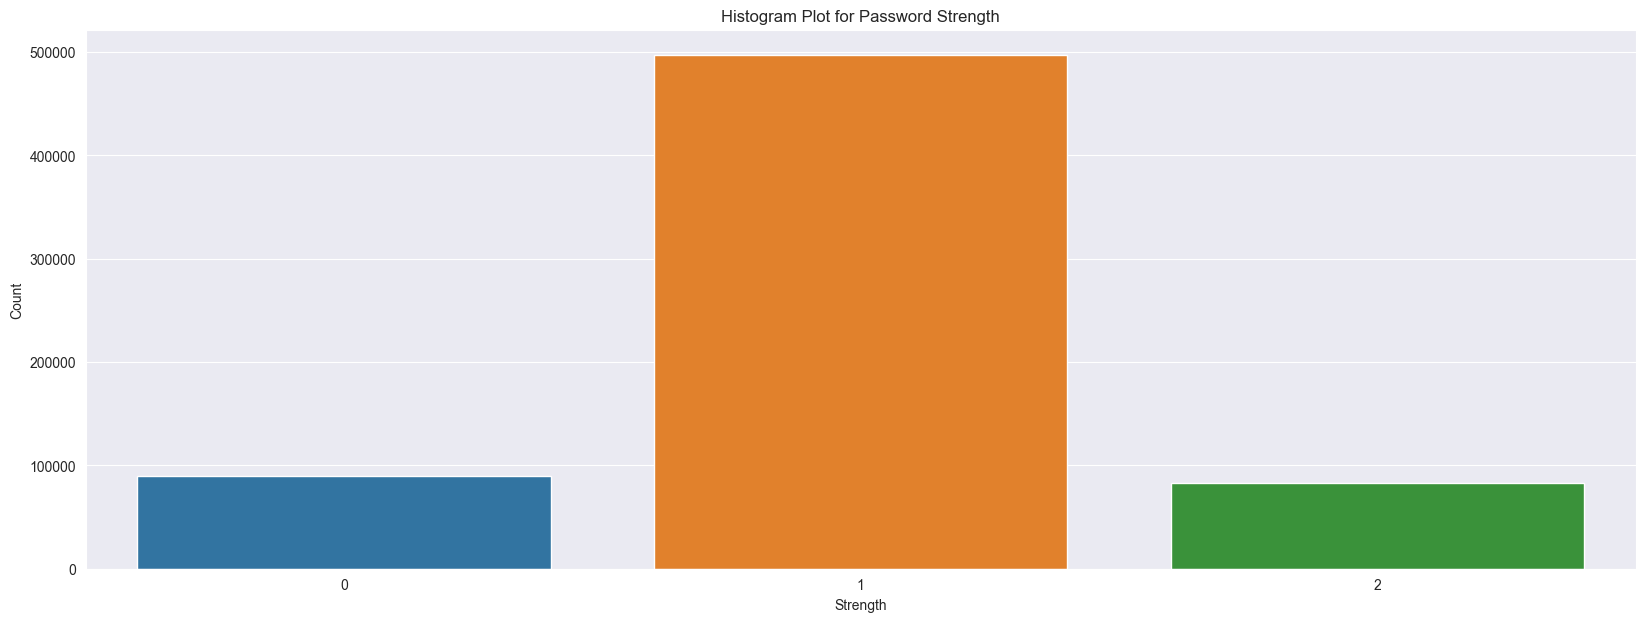

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['strength'])
plt.title('Histogram Plot for Password Strength')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.show()

**Helper Functions**

*   **length**: is used to compute the length of string
*   **count_capital**: is used to count the capital letters of string
*   **count_small**: is used to count the small letters of string
*   **count_special**: is used to count the special characters of string
*   **count_numbers**: is used to count the numbers exists of string

In [17]:
length        = lambda str_val: len(str_val)
count_capital = lambda str_val: sum(1 for i in str_val if i.isupper())
count_small   = lambda str_val: sum(1 for i in str_val if i.islower())
count_special = lambda str_val: sum(1 for i in str_val if i not in string.ascii_letters+string.digits)
count_number  = lambda str_val: sum(1 for i in str_val if i in string.digits)

**Applying different functions on the data**

In [18]:
data['length']  = pd.DataFrame(data.password.apply(length))
data['small']   = pd.DataFrame(data.password.apply(count_small))
data['capital'] = pd.DataFrame(data.password.apply(count_capital))
data['special'] = pd.DataFrame(data.password.apply(count_special))
data['numeric'] = pd.DataFrame(data.password.apply(count_number))

**Data shape after adding new columns**

In [19]:
data.head()

,password,strength,length,small,capital,special,numeric
0,kzde5577,1,8,4,0,0,4
1,kino3434,1,8,4,0,0,4
2,visi7k1yr,1,9,7,0,0,2
3,megzy123,1,8,5,0,0,3
4,lamborghin1,1,11,10,0,0,1


**Histogram for Password Length**

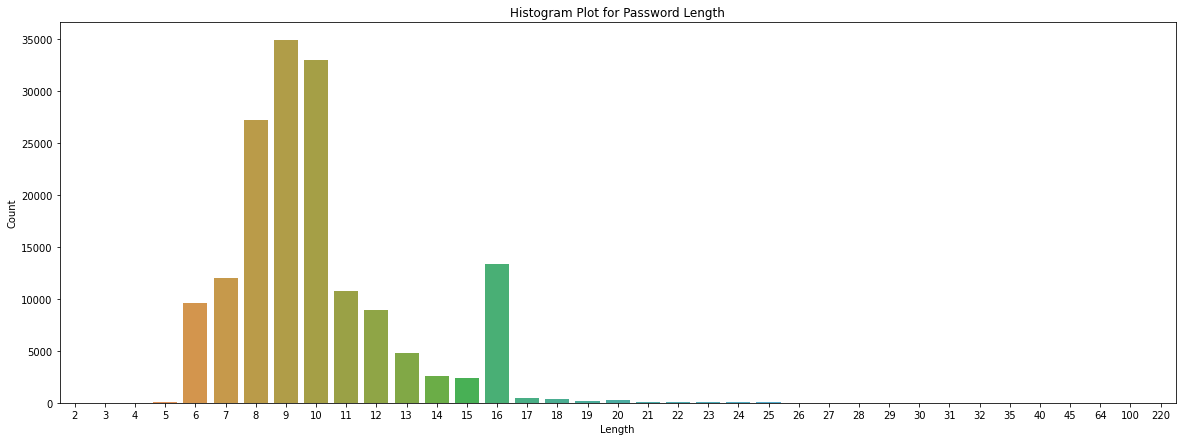

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['length'])
plt.title('Histogram Plot for Password Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

**Histogram for Capital Letters**

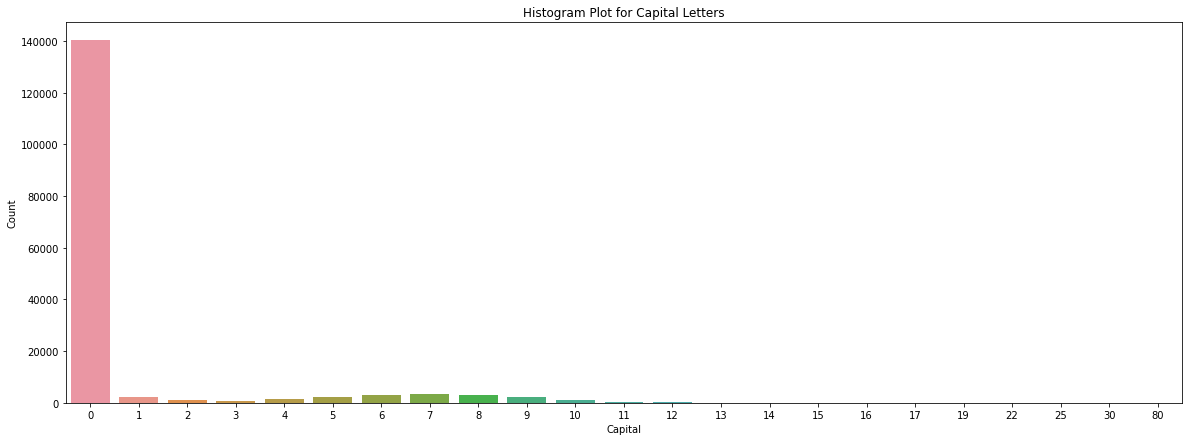

In [59]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['capital'])
plt.title('Histogram Plot for Capital Letters')
plt.xlabel('Capital')
plt.ylabel('Count')
plt.show()

**Histogram for Small Letters**

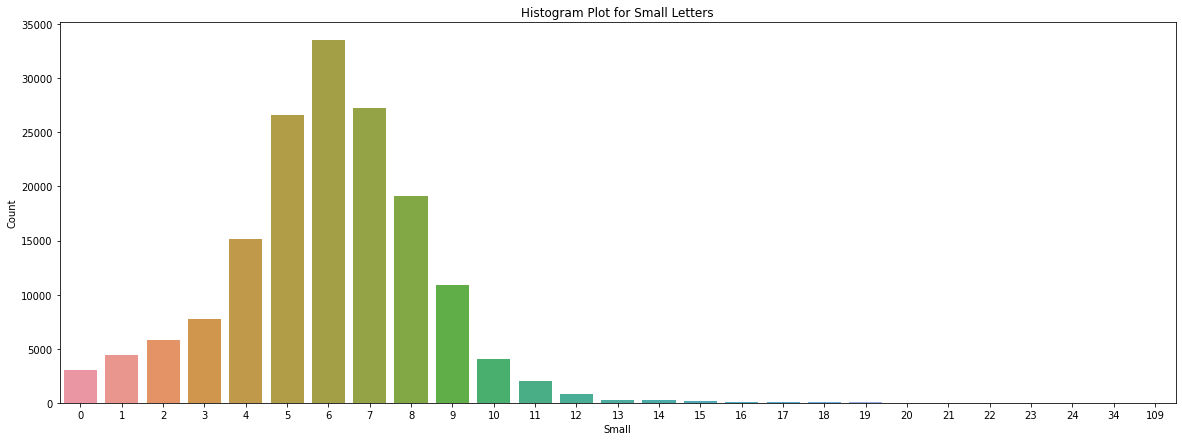

In [60]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['small'])
plt.title('Histogram Plot for Small Letters')
plt.xlabel('Small')
plt.ylabel('Count')
plt.show()

**Histogram for Special Characters**

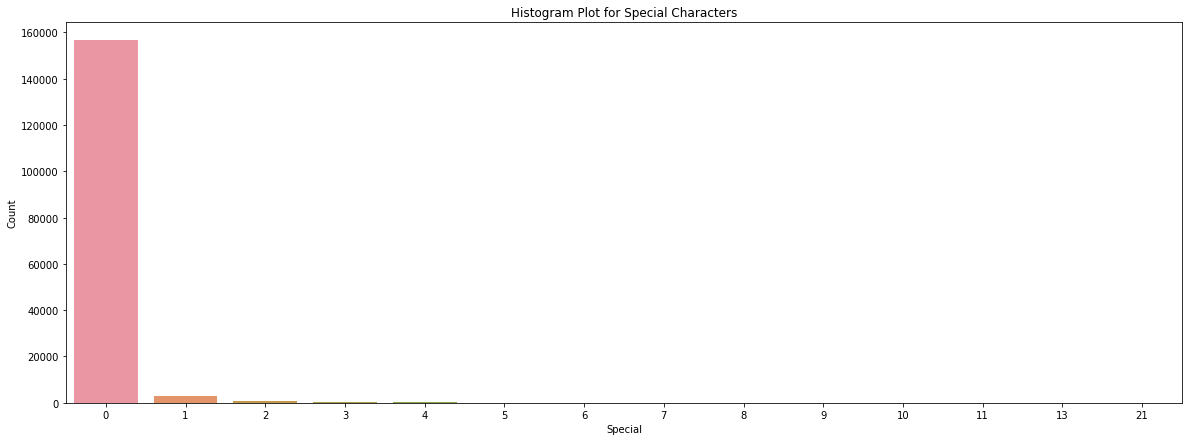

In [65]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['special'])
plt.title('Histogram Plot for Special Characters')
plt.xlabel('Special')
plt.ylabel('Count')
plt.show()

**Histogram for Numeric Values**

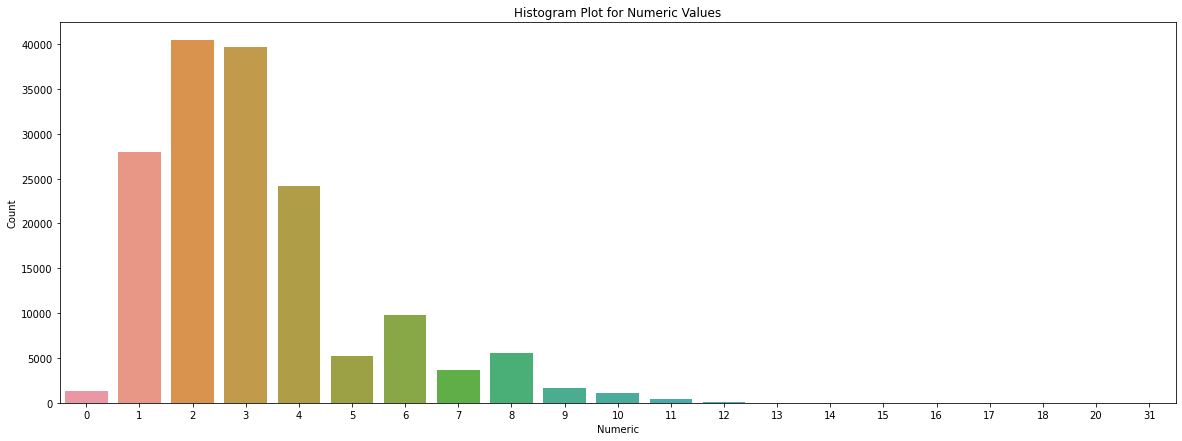

In [63]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['numeric'])
plt.title('Histogram Plot for Numeric Values')
plt.xlabel('Numeric')
plt.ylabel('Count')
plt.show()

#Preparing the data for training models

**After adding new columns, we need to study the relation between the newly added ones "length, small, capital, special, numeric " and the old one "strength".<br>
Which one has the most bowerfull affect on the length, in cour case affect means wieght**

In [73]:
y_values = data['strength'].values
x_values = data[['length','capital','small','special','numeric']].values

In [76]:
x_values.shape, y_values.shape

((161177, 5), (161177,))

**Split data into train & test data**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=40)

In [79]:
x_train.shape, y_train.shape

((112823, 5), (112823,))

In [80]:
x_test.shape, y_test.shape

((48354, 5), (48354,))

**Applying standard scaler on data**

In [81]:
StanScaler = StandardScaler()
x_train_scaled = StanScaler.fit_transform(x_train)
x_test_scaled  = StanScaler.transform(x_test)

#Applying Decision Tree Classifier algorithm

In [97]:
DTC_Model = DecisionTreeClassifier()
DTC_Model = DTC_Model.fit(x_train_scaled, y_train)

[Text(0.4, 0.8333333333333334, 'X[0] <= -0.889\ngini = 0.415\nsamples = 112823\nvalue = [15035, 83799, 13989]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 15035\nvalue = [15035, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 1.254\ngini = 0.245\nsamples = 97788\nvalue = [0, 83799, 13989]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 83799\nvalue = [0, 83799, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 13989\nvalue = [0, 0, 13989]')]

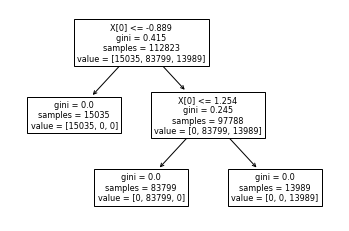

In [85]:
plot_tree(DTC_Model)

In [99]:
dtc_y_pred = DTC_Model.predict(x_test_scaled)
print("The accuracy of the model is: ",accuracy_score(y_test, dtc_y_pred)*100," % !!!")

The accuracy of the model is:  100.0  % !!!


In [100]:
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6584
         1.0       1.00      1.00      1.00     35765
         2.0       1.00      1.00      1.00      6005

    accuracy                           1.00     48354
   macro avg       1.00      1.00      1.00     48354
weighted avg       1.00      1.00      1.00     48354



In [103]:
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
print(dtc_cm)

[[ 6584     0     0]
 [    0 35765     0]
 [    0     0  6005]]


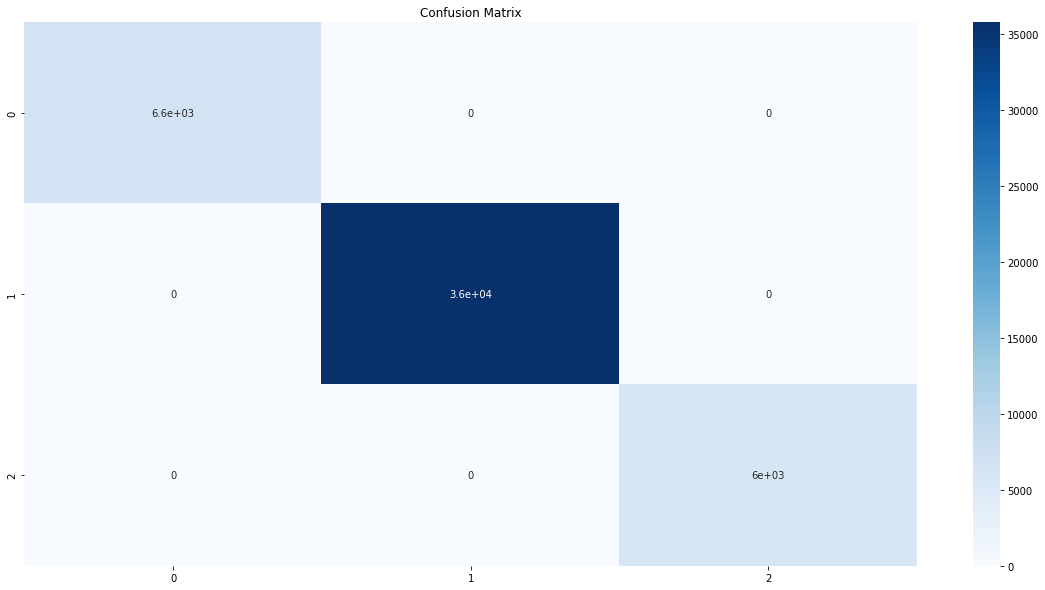

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(dtc_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Applying Logistic Regression algorithm

In [106]:
LR_Model = LogisticRegression()
LR_Model = LR_Model.fit(x_train_scaled, y_train)

In [107]:
lr_y_pred = LR_Model.predict(x_test_scaled)
print("The accuracy of the model is: ",accuracy_score(y_test, lr_y_pred)*100," % !!!")

The accuracy of the model is:  99.99793191876577  % !!!


In [109]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6584
         1.0       1.00      1.00      1.00     35765
         2.0       1.00      1.00      1.00      6005

    accuracy                           1.00     48354
   macro avg       1.00      1.00      1.00     48354
weighted avg       1.00      1.00      1.00     48354



In [111]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

[[ 6583     1     0]
 [    0 35765     0]
 [    0     0  6005]]


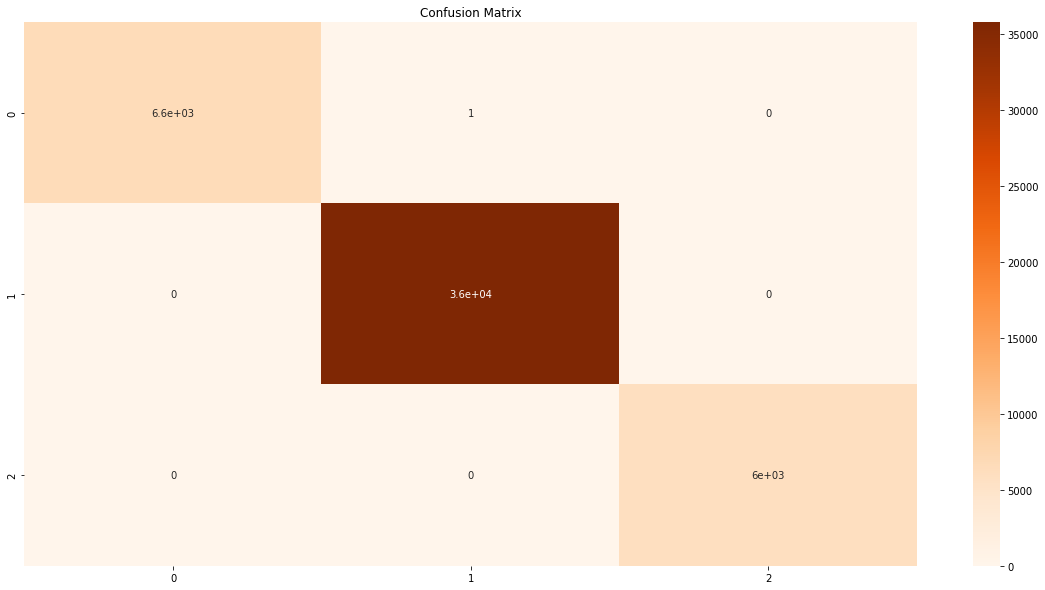

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(lr_cm, annot=True, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

#Applying Linear Support vector Machine algorithm


In [114]:
LSVC_Model = LinearSVC()
LSVC_Model = LSVC_Model.fit(x_train_scaled, y_train)

In [116]:
lsvc_y_pred = LSVC_Model.predict(x_test_scaled)
print("The accuracy of the model is: ", accuracy_score(y_test, lsvc_y_pred)*100," % !!!")

The accuracy of the model is:  99.68978781486537  % !!!


In [117]:
print(classification_report(y_test, lsvc_y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6584
         1.0       1.00      1.00      1.00     35765
         2.0       1.00      0.99      0.99      6005

    accuracy                           1.00     48354
   macro avg       0.99      1.00      1.00     48354
weighted avg       1.00      1.00      1.00     48354



In [118]:
lsvc_cm = confusion_matrix(y_test, lsvc_y_pred)
print(lsvc_cm)

[[ 6583     1     0]
 [   63 35679    23]
 [    0    63  5942]]


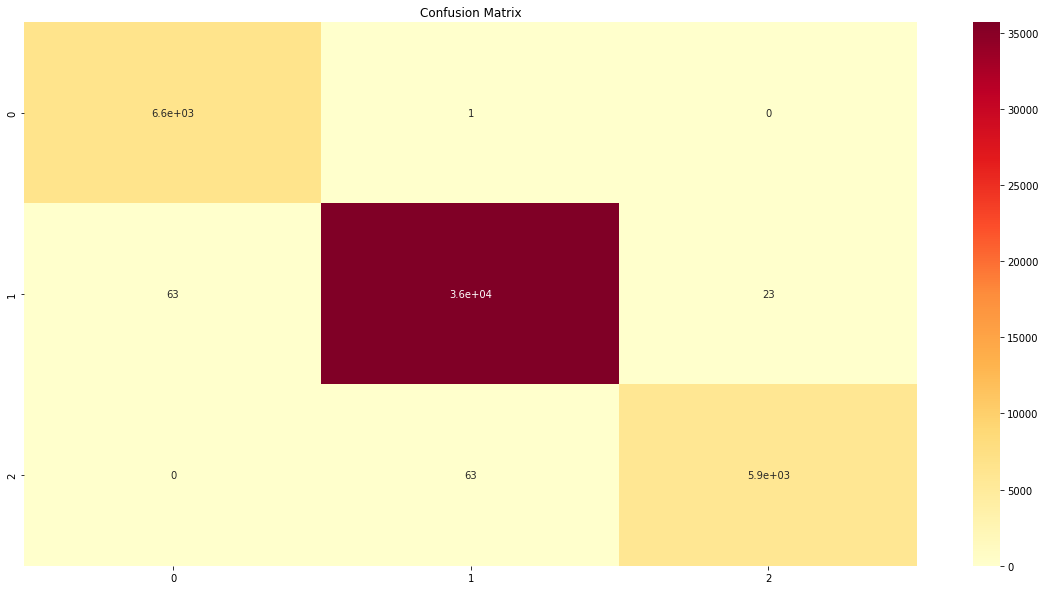

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(lsvc_cm, annot=True, cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.show()